HHARNet-> Hamza Human Activity Recognition Architecture

# Cloing the dataset of Smartphone for HAR

> Indented block


## with Deep Learing 
### CNN

In [ ]:
#cloing the dataset of Smartphone for HAR
print ("Cloning dataset and unzipping in ")
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
!unzip UCI\ HAR\ Dataset.zip
!mv /content/UCI\ HAR\ Dataset/ UCI_HAR_Dataset # renaming the directory without spaces
print ("contents after unzipping")
!ls UCI_HAR_Dataset
print ("Current directry is ")
!pwd
print ("contents of current directory")
!ls

Cloning dataset and unzipping in 
--2020-08-31 10:44:56--  https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60999314 (58M) [application/x-httpd-php]
Saving to: ‘UCI HAR Dataset.zip’

UCI HAR Dataset.zip 100%[===================>]  58.17M  74.1MB/s    in 0.8s    

2020-08-31 10:44:57 (74.1 MB/s) - ‘UCI HAR Dataset.zip’ saved [60999314/60999314]

Archive:  UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI H

In [ ]:
!ls /content/UCI_HAR_Dataset

activity_labels.txt  features_info.txt	features.txt  README.txt  test	train


In [ ]:
# cnn model
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical

In [ ]:
import keras
keras.__version__

'2.4.3'

In [ ]:
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values

# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix=''):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded

# load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	#body acceleration as bohy is part of total acceleration and is extracted after filteration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y

# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + '/content/UCI_HAR_Dataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + '/content/UCI_HAR_Dataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy

In [ ]:
# load data
trainX, trainy, testX, testy = load_dataset()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)


## Cross Validation


In [ ]:
from sklearn.model_selection import train_test_split
X_cross, X_test, y_cross, y_test = train_test_split(testX, testy, test_size=0.5, random_state=42)
print(X_cross.shape, y_cross.shape)
print(X_test.shape, y_test.shape)

(1473, 128, 9) (1473, 6)
(1474, 128, 9) (1474, 6)


In [ ]:
from sklearn.metrics import accuracy_score
# evaluate a single model
def evaluate_model(testX, testy, model):
    # make predictions
    _,accuracy = model.evaluate(testX, testy, verbose=0)
    return accuracy * 100.0

In [ ]:
from keras import models
from keras.models import Model
from keras.layers import Input
import tensorflow

In [ ]:
def inception_network(trainX, trainy, testX, testy):
#  verbose, epochs, batch_size = 0, 50, 64
  n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
  input_shape=(n_timesteps,n_features)
  #input to block "a"

  signal_input = Input(shape=input_shape, name='data')
  #<-------------------------------------------------------------Module 1------------------------------------------->

  layer_1_a = Conv1D(filters=10,  kernel_size=1, padding='same', activation='relu',name='1x1_a_3')(signal_input) #with 1x1 conv
  layer_1_a = Conv1D(filters=10,  kernel_size=3, padding='same', activation='relu',name='1x3_a')(layer_1_a) # with 1x3 

  layer_2_a = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_a_5')(signal_input) #with 1x1
  layer_2_a = Conv1D(10,  kernel_size=5, padding='same', activation='relu',name='1x5_a')(layer_2_a)#with 1x5

  layer_3_a = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_a_7')(signal_input) #with 1x1
  layer_3_a = Conv1D(10,  kernel_size=7, padding='same', activation='relu',name='1x7_a')(layer_3_a) #with 1x7

  mid_1_a = keras.layers.concatenate([layer_1_a, layer_2_a,layer_3_a,signal_input], axis = 2)
  #<------------------------------------------------------------Concatenated Module 1 with input---------------------->

  #<-----1x1 x64 layer ----->
  mid_1_a=Conv1D(filters=64,  kernel_size=1, padding='same', activation='relu',name='a_1x1_size_reduce')(mid_1_a) 
 
  mid_1_a=Dropout(0.50)(mid_1_a) # Dropout -> ready to be connected to last concatenation
  
  #<-------------------------------------------------------------Module 2------------------------------------------->

  layer_1_b = Conv1D(filters=10,  kernel_size=1, padding='same', activation='relu',name='1x1_b_3')(mid_1_a) #with 1x1 conv
  layer_1_b = Conv1D(filters=10,  kernel_size=3, padding='same', activation='relu',name='1x3_b')(layer_1_b) # with 1x3 

  layer_2_b = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_b_5')(mid_1_a) #with 1x1
  layer_2_b = Conv1D(10,  kernel_size=5, padding='same', activation='relu',name='1x5_b')(layer_2_b)#with 1x5

  layer_3_b = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_b_7')(mid_1_a) #with 1x1
  layer_3_b = Conv1D(10,  kernel_size=7, padding='same', activation='relu',name='1x7_b')(layer_3_b) #with 1x7

  mid_1_b = keras.layers.concatenate([layer_1_b, layer_2_b,layer_3_b,signal_input,mid_1_a], axis = 2)
  #<------------------------------------------------------------Concatenated Module 2 with input &  mid 1---------------------->

  #<-----1x1 x34 layer ----->
  mid_1_b=Conv1D(filters=34,  kernel_size=1, padding='same', activation='relu',name='b_1x1_size_reduce')(mid_1_b) 
  mid_1_b=Dropout(0.50)(mid_1_b)

  #<-------------------------------------------------------------Module 3------------------------------------------->

  layer_1_c = Conv1D(filters=10,  kernel_size=1, padding='same', activation='relu',name='1x1_c_3')(mid_1_b) #with 1x1 conv
  layer_1_c = Conv1D(filters=10,  kernel_size=3, padding='same', activation='relu',name='1x3_c')(layer_1_c) # with 1x3 

  layer_2_c = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_c_5')(mid_1_b) #with 1x1
  layer_2_c = Conv1D(10,  kernel_size=5, padding='same', activation='relu',name='1x5_c')(layer_2_c)#with 1x5

  layer_3_c = Conv1D(10,  kernel_size=1, padding='same', activation='relu',name='1x1_c_7')(mid_1_b) #with 1x1
  layer_3_c = Conv1D(10,  kernel_size=7, padding='same', activation='relu',name='1x7_c')(layer_3_c) #with 1x7

  #<------------------------------------------------------------Concatenated Module 3 with input &  mid 1 & mid 2---------------------->
  mid_1_c = keras.layers.concatenate([layer_1_c, layer_2_c,layer_3_c,signal_input,mid_1_a,mid_1_b], axis = 2) 

  #<-----1x1 x8 layer ----->
  mid_1_d=Conv1D(filters=8,  kernel_size=1, padding='same', activation='relu',name='d_1x1_size_reduce')(mid_1_c)
  mid_1_d=Dropout(0.50)(mid_1_d)

  #<-----1x1 x6 layer ----->
  before_flat=Conv1D(filters=6,  kernel_size=1, padding='same', activation='relu',name='before_2_1x1_size_reduce')(mid_1_d)
  
  globelAverage=keras.layers.GlobalAveragePooling1D(data_format='channels_last')(before_flat)
  
  out = Dense(n_outputs, activation='softmax', name='predictions')(globelAverage)
  
  rez = Model(inputs=signal_input, outputs=out)
  
  return rez

In [ ]:
model=inception_network(trainX, trainy, X_cross, y_cross)

In [ ]:
print (model)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, 128, 9)]     0                                            
__________________________________________________________________________________________________
1x1_a_3 (Conv1D)                (None, 128, 10)      100         data[0][0]                       
__________________________________________________________________________________________________
1x1_a_5 (Conv1D)                (None, 128, 10)      100         data[0][0]                       
__________________________________________________________________________________________________
1x1_a_7 (Conv1D)                (None, 128, 10)      100         data[0][0]                       
_______________________________________________________________________________________

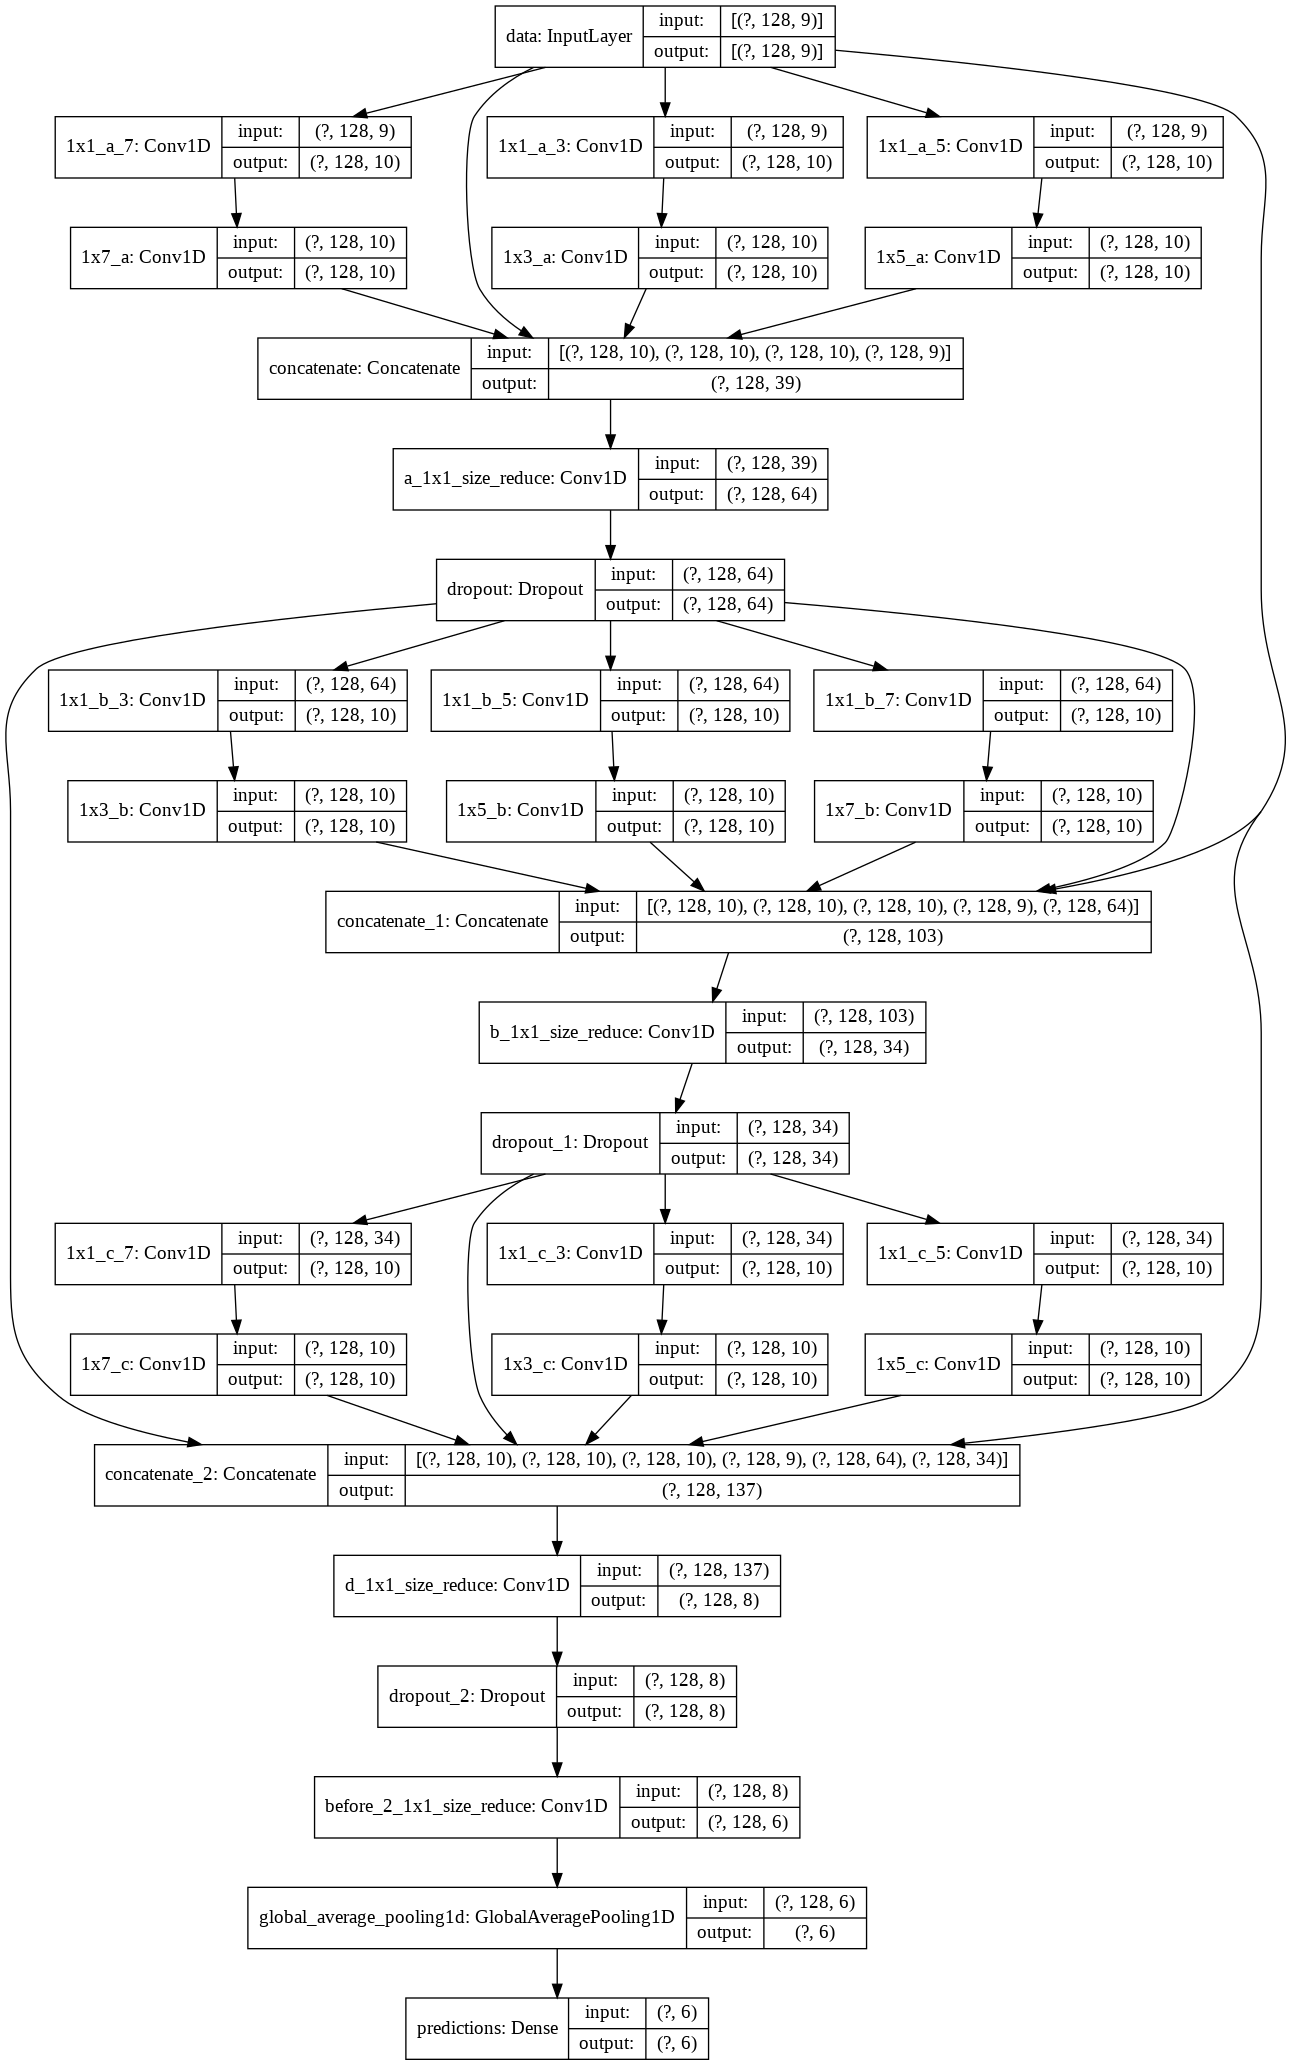

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:

inception= model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])


In [ ]:
verbose, epochs, batch_size = 0, 50, 120
history=model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=1)
	# evaluate model

Epoch 1/50
62/62 [==============================] - 1s 16ms/step - loss: 1.5302 - accuracy: 0.2772
Epoch 2/50
62/62 [==============================] - 1s 10ms/step - loss: 0.9162 - accuracy: 0.6319
Epoch 3/50
62/62 [==============================] - 1s 10ms/step - loss: 0.5667 - accuracy: 0.7675
Epoch 4/50
62/62 [==============================] - 1s 10ms/step - loss: 0.4558 - accuracy: 0.8183
Epoch 5/50
62/62 [==============================] - 1s 10ms/step - loss: 0.3999 - accuracy: 0.8460
Epoch 6/50
62/62 [==============================] - 1s 10ms/step - loss: 0.3448 - accuracy: 0.8683
Epoch 7/50
62/62 [==============================] - 1s 10ms/step - loss: 0.2955 - accuracy: 0.8863
Epoch 8/50
62/62 [==============================] - 1s 10ms/step - loss: 0.2491 - accuracy: 0.9089
Epoch 9/50
62/62 [==============================] - 1s 10ms/step - loss: 0.2231 - accuracy: 0.9158
Epoch 10/50
62/62 [==============================] - 1s 10ms/step - loss: 0.1911 - accuracy: 0.9279
Epoch 11/

In [ ]:
_, accuracy = model.evaluate(X_cross, y_cross, batch_size=batch_size, verbose=0)
print ("accuracy = ",accuracy*100)

accuracy =  89.61303234100342


In [ ]:
_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print ("accuracy = ",accuracy*100)

accuracy =  89.44689631462097


# Confusion Matrix

In [ ]:
labels=['WALKING','WALKING_UPSTAIRS','WALKING_DOWNSTAIRS','SITTING','STANDING','LAYING']

In [ ]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# create a confusion matrix to visually represent incorrectly classified images
def plot_confusion_matrix(y_true, y_pred, classes, out_path=""):
    cm = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cm, index=[i for i in classes], columns=[i for i in classes])
    plt.figure(figsize=(6, 6))
    ax = sn.heatmap(df_cm, annot=True, square=True, fmt="d", linewidths=.2,cmap="YlGnBu" ,cbar_kws={"shrink": 0.8})
    return ax

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


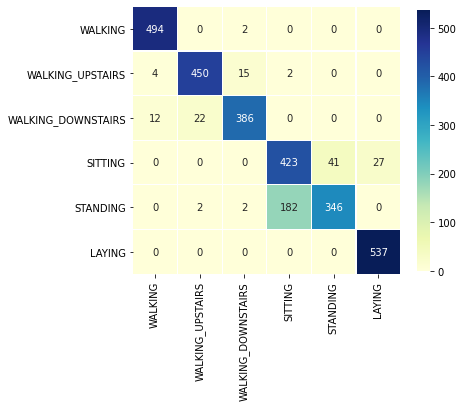

In [ ]:
y_pred=model.predict(testX)
plot_confusion_matrix(testy.argmax(axis=1),y_pred.argmax(axis=1),labels)

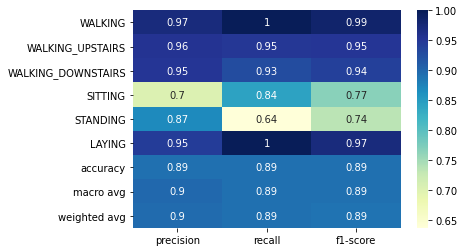

In [ ]:
from sklearn.metrics import classification_report
import seaborn as sns
y_pred=model.predict(X_test)
report= classification_report(y_test.argmax(axis=1),y_pred.argmax(axis=1),target_names=labels,output_dict=True)
#print (report)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T,cmap="YlGnBu", annot=True)

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
tensorflow__version

NameError: ignored

In [ ]:
tensorflow.__version__

'2.3.0'

In [ ]:
import seaborn as sns
sns.__version__

'0.10.1'

In [ ]:
import pandas as pd
pd.__version__

'1.0.5'

In [ ]:
import matplotlib
matplotlib.__version__

'3.2.2'

In [ ]:
import numpy as np
np.__version__

'1.18.5'

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'